## Simple linear regreesion

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('height-weight.csv')
print(data.head())
print(data.info())

   Weight  Height
0      45     120
1      58     135
2      48     123
3      60     145
4      70     160
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes
None


## Scatter plot

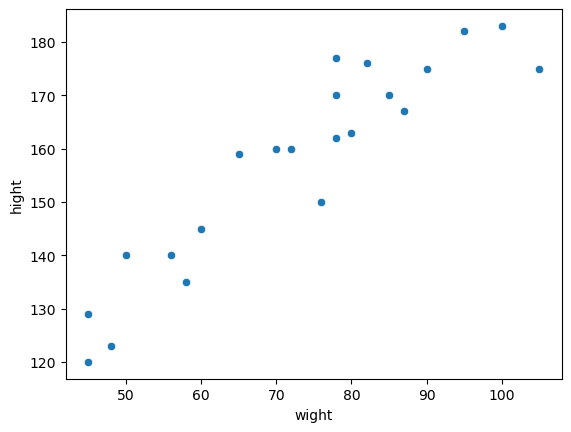

In [3]:
sns.scatterplot(data=data,x=data["Weight"],y=data["Height"])
plt.ylabel("hight")
plt.xlabel("wight")
plt.show()

## Finding the correction

In [4]:
data.corr()  # help to find the realtion ship btween the data 

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


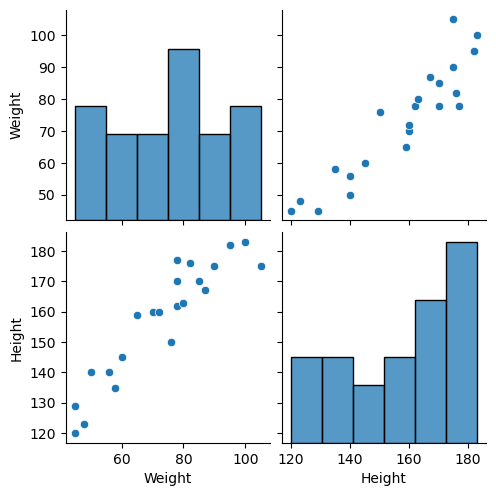

In [5]:
#  Use the seaborn the realtionhsip
sns.pairplot(data)
plt.show()

In [6]:
#  First step in linear regreesion 
#  independent and dependent feature
X=data[["Weight"]]  # independent feature are always in the form of dataframe 
# or the 2 Dimensional array
X.head(2)


,Weight
0,45
1,58


In [7]:
#  Now we will create the independence feature
#  the independent feature are in series they are in series 
y=data["Height"]   # this variable can be in series form and
#  or in  1D arrays

In [8]:
#  Train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=  train_test_split(X,y,test_size=0.25,random_state=42)

In [9]:
## Standerdization
#  let assume if the x is calulated in kg ans y in cm their unit are different
# so for gradient desent take long time to calulate the gobal minima
#  so we will use Z score for changes all the unit into same unit
#  that minimize the caluculation of the gradient descient

In [10]:
#  Z score for Standerdization
from sklearn.preprocessing import StandardScaler

In [11]:
Sclar=StandardScaler()
X_train=Sclar.fit_transform(X_train)

In [12]:
#  fit_transformation only in Train
#  transfor in for Test beacuse we not know any hint of train data to test data
X_test=Sclar.transform(X_test)

In [13]:
#  Apply Machine learning algorith:
#  we will use the Simple Linear regression
from sklearn.linear_model import LinearRegression

In [14]:
regression=LinearRegression(n_jobs=-1) # create the object

In [15]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [16]:
# y=Bo -B1X1 here we will calulate the B1
print("Cofficient or slope:",regression.coef_)
#  1 unit move wrt to x axis they more in y axis 1.0478
print("Inercept is:",regression.intercept_)
#  if the wait value is what was the point the where the line meet in y axis

Cofficient or slope: [17.2982057]
Inercept is: 156.47058823529412


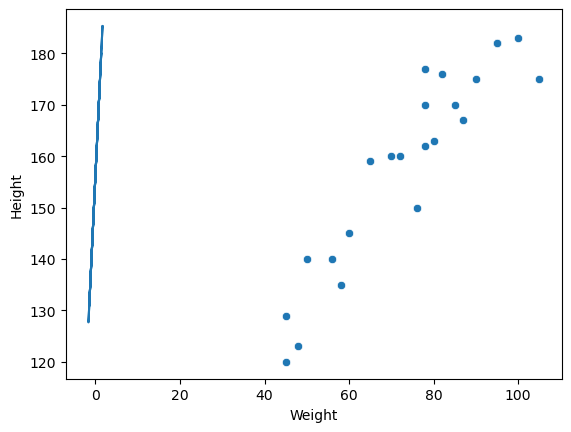

In [17]:
#  Plot the best fit line:
#  Plot the Training Data Plot BEst fit line
sns.scatterplot(data=data,x=data["Weight"],y=data["Height"])
plt.plot(X_train,regression.predict(X_train))
plt.show()

### Predication of test data
* prediction Height output=intercept+coef_(Wights)
* y_pred_test=80.52+1.04(X_test)

In [18]:
#  Prediction for test data
y_pred=regression.predict(X_test)

In [19]:
# Peformance Matrics

from sklearn.metrics import mean_absolute_error,mean_squared_error

In [20]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print("mse: ",mse)
print("mae: ",mae)
print("rmse: ",rmse)

mse:  114.84069295228699
mae:  9.665125886795005
rmse:  10.716374991212605


In [21]:
#  R square calculation:
from sklearn.metrics import r2_score

In [22]:
score=r2_score(y_test,y_pred)
print("r2_score:",score)

r2_score: 0.7360826717981276


In [23]:
#  Calculation of R adjustable:
1-(1-score)*(len(y_test)-1)/len(y_test)-X_test.shape[1]-1

-1.2199311068348937

In [24]:
#  Use all the same things for ola:
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [25]:
prediction=model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [26]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Thu, 16 Oct 2025   Prob (F-statistic):                       0.664
Time:                        20:03:49   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\sriva\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [29]:
#  How to prediction for new data
regression.predict(Sclar.transform([[72]]))

c:\Users\sriva\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])